In [1]:
import sys
import os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

current_dir = os.getcwd()
src_dir = os.path.join(current_dir, '..', 'src')

if src_dir not in sys.path:
    sys.path.append(src_dir)

from tumor_dataset import TumorClassificationDataset
from enums import DataSplit

In [2]:
DATASETS_ROOT = os.path.join(current_dir, '..', 'datasets')
BATCH_SIZE = 12

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor(),  # Convert images to tensor
    # Add any other transforms here, e.g., normalization
])

dataset = TumorClassificationDataset(root_dir=DATASETS_ROOT, split=DataSplit.TRAIN, transform=transform)

data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

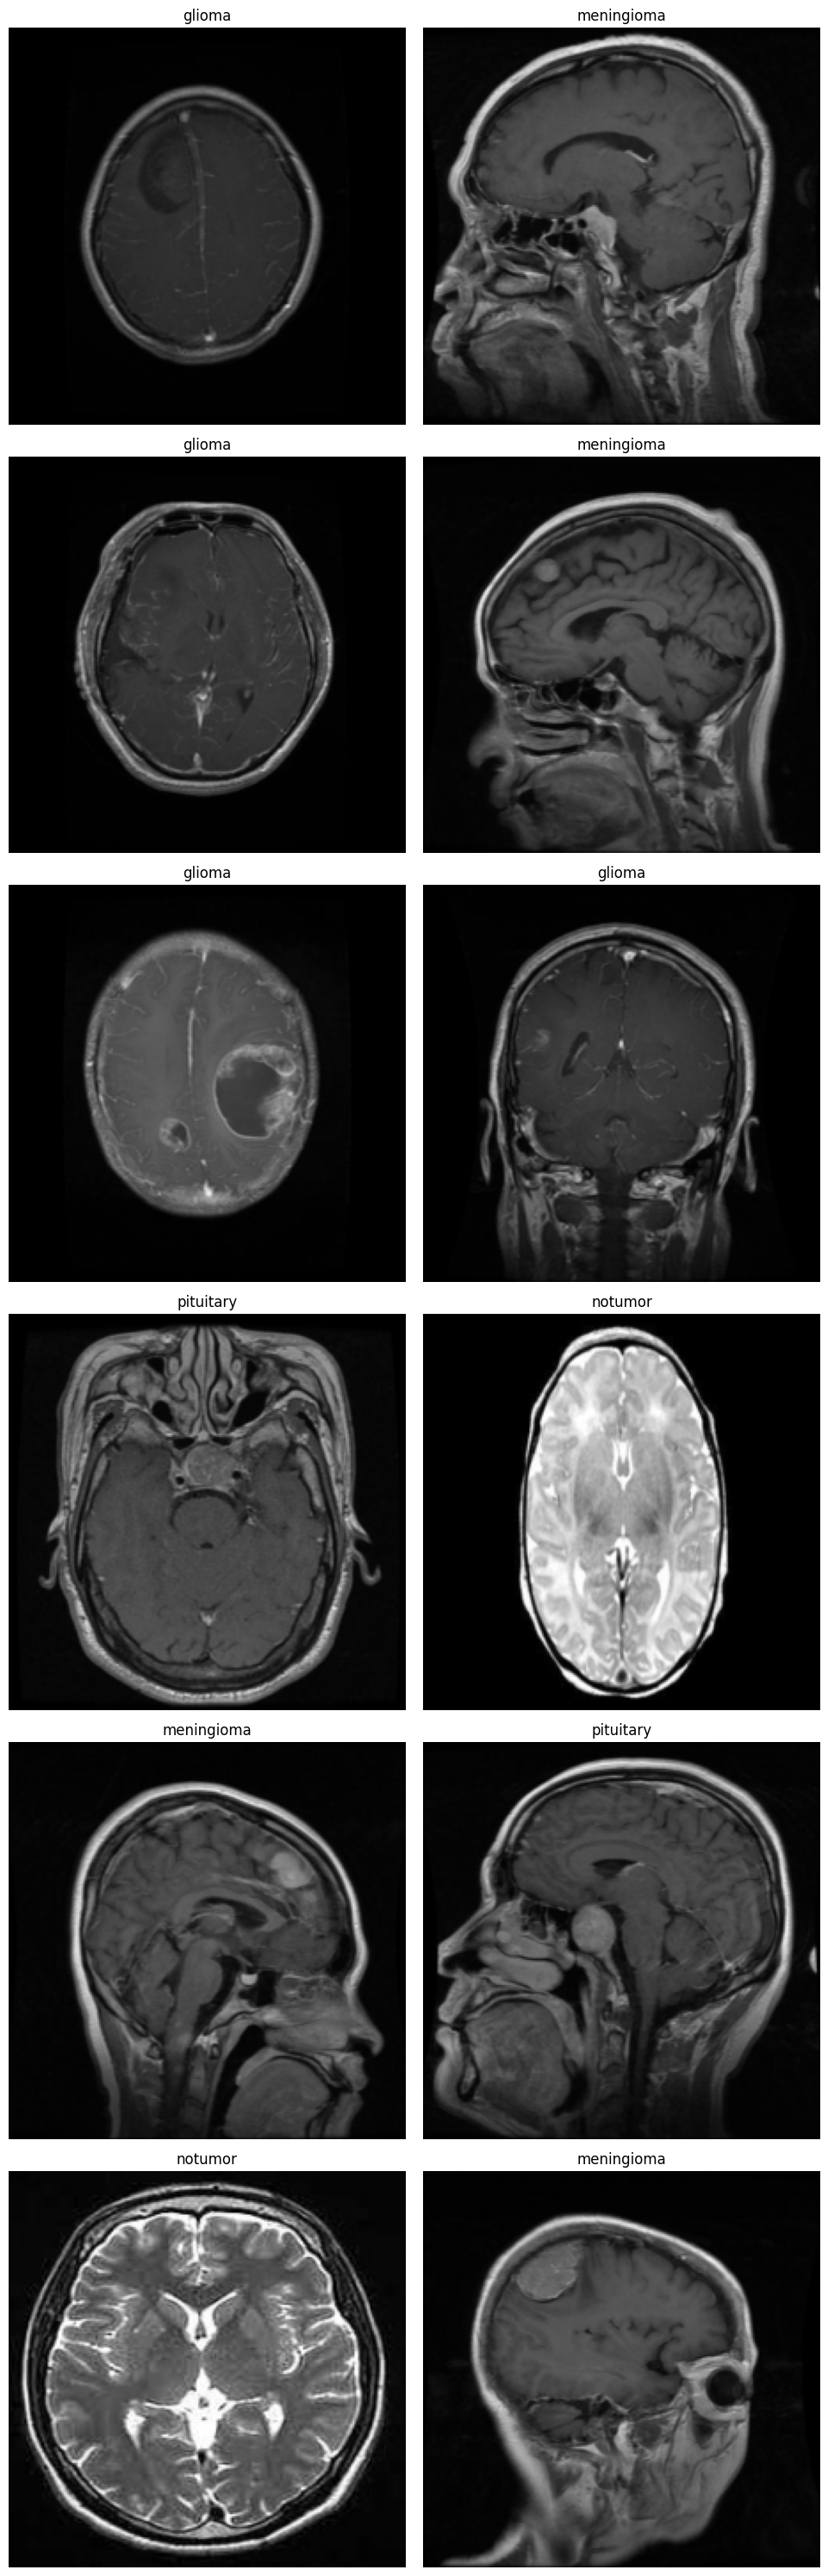

In [3]:
def show_images_with_labels(images, labels, nmax=32):
    # Convert a batch of images and labels into a grid of images with labels underneath
    n_rows = (nmax + 1) // 2  # Add 1 to nmax to ensure rounding up if nmax is odd
    n_cols = 2  # Two images per row
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))
    axs = axs.flatten()
    
    for ax, image, label in zip(axs, images, labels):
        ax.imshow(image.permute(1, 2, 0))  # Convert from PyTorch's CxHxW to Matplotlib's HxWxC
        ax.set_title(label)
        ax.axis('off')
    
    # Hide any remaining subplots not used
    for ax in axs[len(images):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

images, labels = next(iter(data_loader))
transformed_labels = [dataset.idx_to_class[label.item()] for label in labels]
show_images_with_labels(images, transformed_labels, nmax=BATCH_SIZE) 